In [1]:
from scipy.stats import poisson
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1

Сортируем по возрастанию, минимальное и максимальное значение соответственно а и b

# 2 

In [2]:
n = 17
rv = poisson(n)

In [3]:
df = pd.DataFrame({}, columns=['mean error', 'var error'])
for i in range(15):
    sample = rv.rvs(size=100)
    df = df.append({'mean error': abs(sample.mean() - n),
                    'var error':abs(sample.std()**2 - n)},
                   ignore_index=True)

In [4]:
df

,mean error,var error
0,0.18,4.5476
1,0.44,1.6736
2,0.44,1.7736
3,0.26,1.8524
4,0.20,1.6600
5,0.05,2.0275
6,0.37,2.3731
7,0.36,0.9904
8,0.89,2.2221
9,0.10,3.9700


In [5]:
for i, j in df.T.iterrows():
    print(i, '=', j.mean())

mean error = 0.2860000000000004
var error = 2.0909


!wget https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar11/breast_cancer_1000_genes.tsv

!wget https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar11/breast_cancer_key_genes.tsv

In [6]:
df1000 = pd.read_csv('breast_cancer_1000_genes.tsv', sep='\t', index_col=0)
df_key = pd.read_csv('breast_cancer_key_genes.tsv', sep='\t', index_col=0)

# 3 

$\theta$ = mean(Xn)/n (по определению $\theta$ Bin(m, $\theta$) $\theta$ = E(X)/n)

m = max(Xn) (Самый простой вариант)


# 4 

In [7]:
df1000.head()

,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,...,TCGA-A2-A0YT-01A,TCGA-A2-A1FV-01A,TCGA-A2-A1FW-01A,TCGA-A2-A1FX-01A,TCGA-A2-A1FZ-01A,TCGA-A2-A1G0-01A,TCGA-A2-A1G1-01A,TCGA-A2-A1G4-01A,TCGA-A2-A1G6-01A,TCGA-A2-A259-01A
MT-CO3,12.208682,11.940729,13.206648,12.730925,12.149072,12.731782,12.450704,12.295202,11.796976,12.445482,...,12.651773,13.309171,12.063368,10.807096,11.676859,11.477643,12.042867,12.656959,11.617341,12.116037
MT-CO2,12.635929,12.496213,12.923663,12.780144,11.592246,12.105826,11.925842,12.907561,11.301659,12.192156,...,12.707383,13.619689,12.917135,11.349408,11.126341,11.420112,12.046082,12.216181,11.234004,11.894146
MT-CO1,12.685701,12.396964,12.763896,12.600145,11.909936,12.319483,12.042444,11.626691,11.533184,12.848486,...,12.730155,13.561623,12.534351,9.842210,11.990492,11.854787,12.129189,12.669717,11.581176,11.858962
MT-ND4,12.229181,12.203674,12.262444,12.551871,11.191639,11.919653,11.381076,12.141440,11.445795,11.837751,...,12.664408,13.767060,12.361202,11.488254,11.627389,11.880023,12.107653,12.266376,11.225196,11.643757
MT-ATP6,11.595923,10.911476,11.944841,12.044368,11.162862,11.803961,11.453770,11.100602,11.123729,11.622276,...,11.893174,12.864919,12.315150,10.761852,11.174210,11.277218,11.533258,12.257771,10.692620,10.916781


In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


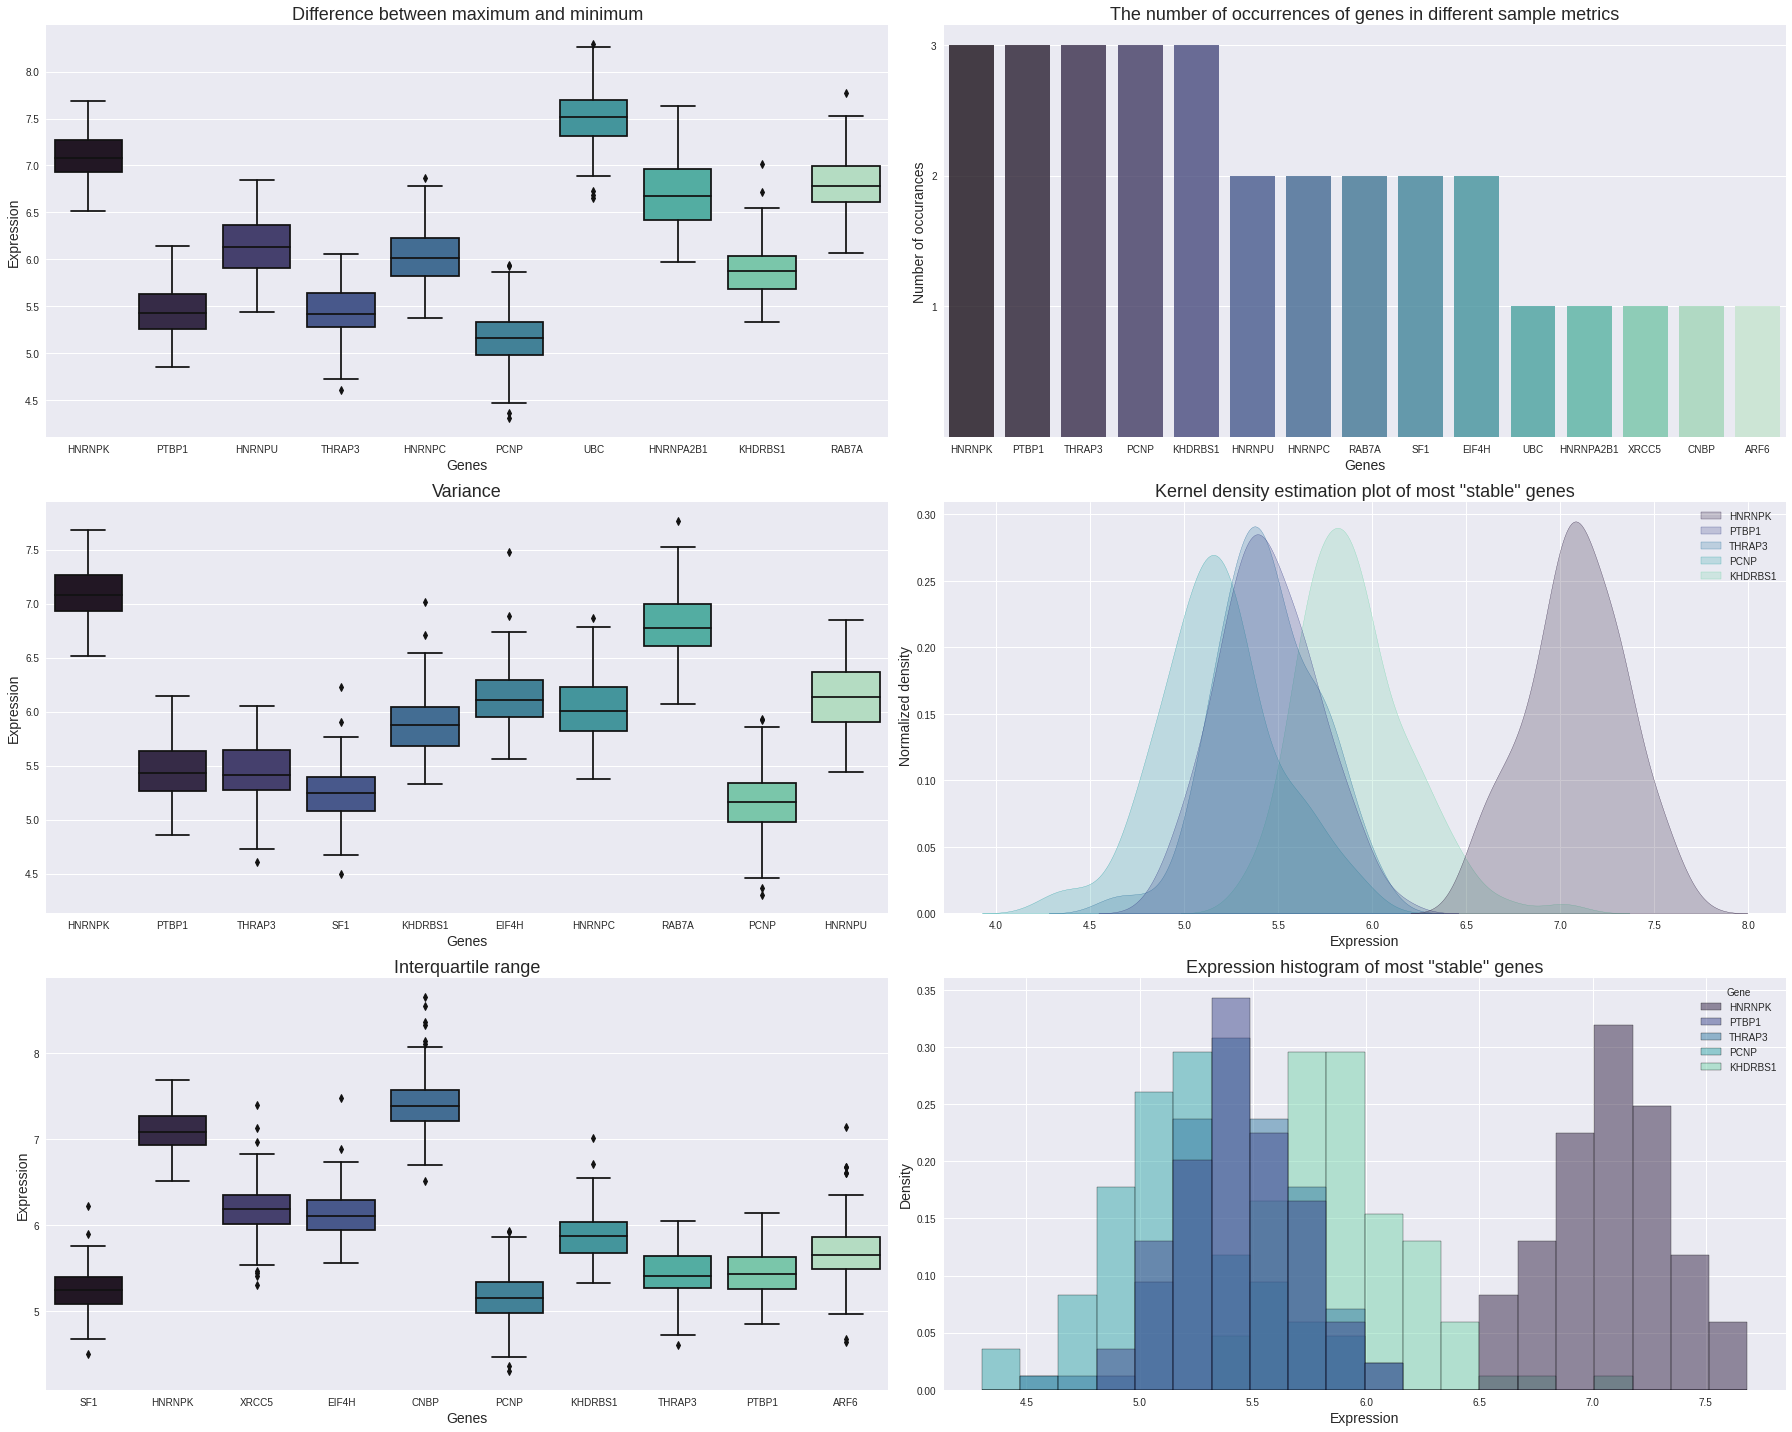

In [9]:
df = pd.DataFrame()
df['Difference between maximum and minimum'] = df1000.max(axis=1) - df1000.min(axis=1)
df['Variance'] = df1000.var(axis=1)
df['Interquartile range'] = df1000.quantile(.75, axis=1) - df1000.quantile(.25, axis=1) 

lsize = 14
tsize = 18
palette = 'mako'

plt.style.use('seaborn')
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
axes = [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1)]
tops = {}

for i, j in zip(df.columns, axes):
    tmp = df.sort_values(i).iloc[:10].index
    for k in tmp:
        tops[k] = tops.get(k, 0) + 1
    sns.boxplot(data=df1000.loc[tmp].T, ax=ax[j], palette=palette)
    
    ax[j].set_title(i, size=tsize)
    ax[j].set_xlabel('Genes', size=lsize)
    ax[j].set_ylabel('Expression', size=lsize)

tops_labels = sorted(tops, key=lambda x: tops[x], reverse=True)
tops_values = [tops[i] for i in tops_labels]

sns.barplot(x=tops_labels, y=tops_values, ax=ax[axes[-3]], alpha=.8, palette=palette)
ax[axes[-3]].set_title('The number of occurrences of genes in different sample metrics', size=tsize)
ax[axes[-3]].set_yticks([i for i in range(1, 4)])
ax[axes[-3]].set_xlabel('Genes', size=lsize)
ax[axes[-3]].set_ylabel('Number of occurances', size=lsize)

tmp = df1000.loc[tops_labels[0:5]]
sns.kdeplot(data=tmp.T, ax=ax[axes[-2]], fill=True, common_norm=True, palette=palette)
ax[axes[-2]].set_title('Kernel density estimation plot of most "stable" genes', size=tsize)
ax[axes[-2]].set_xlabel('Expression', size=lsize)
ax[axes[-2]].set_ylabel(' Normalized density', size=lsize)

tmp = tmp.T.melt(var_name='Gene', value_name='Expression')
sns.histplot(data=tmp, x='Expression', hue='Gene',
             binrange=(tmp.Expression.min(), tmp.Expression.max()), bins=20,
             stat='density', palette=palette, ax=ax[axes[-1]])
ax[axes[-1]].set_title('Expression histogram of most "stable" genes', size=tsize)
ax[axes[-1]].set_xlabel(ax[axes[-1]].get_xlabel(), size=lsize)
ax[axes[-1]].set_ylabel(ax[axes[-1]].get_ylabel(), size=lsize)

plt.tight_layout()
plt.savefig('boxplots_1000', facecolor='white')

# 5 

In [10]:
df_key.head()

,ESR1,PGR,ERBB2,MKI67
TCGA-3C-AAAU-01A,3.691075,2.975339,5.043666,3.314383
TCGA-3C-AALI-01A,0.336400,0.110920,9.717665,3.107031
TCGA-3C-AALJ-01A,4.688752,1.291904,5.630728,2.085183
TCGA-3C-AALK-01A,3.221422,2.930038,7.311545,2.298665
TCGA-4H-AAAK-01A,4.355086,3.867628,5.844283,2.416418


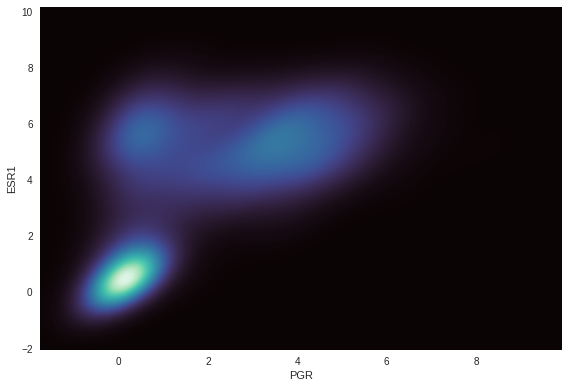

In [11]:
sns.kdeplot(data=df_key, x='PGR', y='ESR1', fill=True, thresh=0, levels=1084, cmap="mako")
plt.tight_layout()

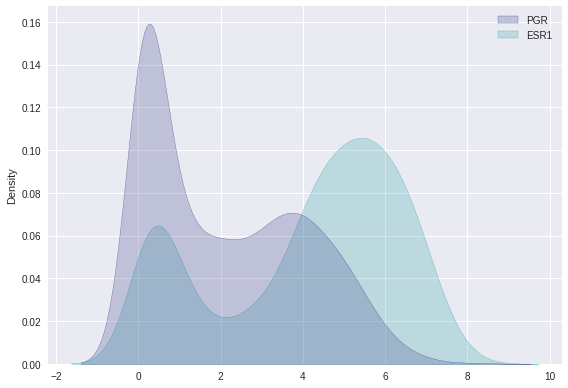

In [12]:
sns.kdeplot(data=df_key[['PGR',"ESR1"]], palette='mako', fill=True)
plt.tight_layout()

<AxesSubplot:ylabel='Density'>

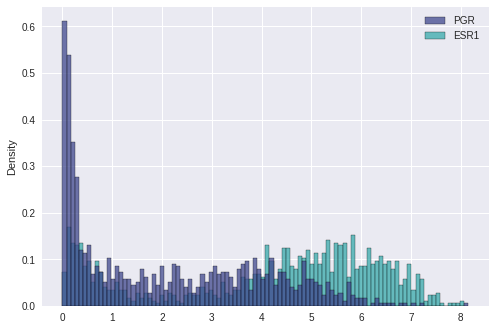

In [13]:
df = df_key[['PGR', 'ESR1']]
sns.histplot(data=df, binrange=(df.min().min(), df.max().max()), bins=100, stat='density', palette='mako')